In [42]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Preparação de Dados

In [3]:
df = pd.read_csv('Sales Dataset.csv')

In [4]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [6]:
df.describe

<bound method NDFrame.describe of      Order ID  Amount  Profit  Quantity         Category      Sub-Category  \
0     B-26776    9726    1275         5      Electronics  Electronic Games   
1     B-26776    9726    1275         5      Electronics  Electronic Games   
2     B-26776    9726    1275         5      Electronics  Electronic Games   
3     B-26776    4975    1330        14      Electronics          Printers   
4     B-26776    4975    1330        14      Electronics          Printers   
...       ...     ...     ...       ...              ...               ...   
1189  B-26370    8825    3594        15        Furniture            Tables   
1190  B-26298    2082     642         8      Electronics            Phones   
1191  B-26298    2082     642         8      Electronics            Phones   
1192  B-26298    2082     642         8      Electronics            Phones   
1193  B-25068     914     163        13  Office Supplies           Markers   

     PaymentMode  Order Date 

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [8]:
df.duplicated().sum()
df = df.drop_duplicates()

In [9]:
df[['Amount', 'Profit', 'Quantity']].describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [10]:
df['City'] = df['City'].str.title().str.strip()

In [11]:
df['Quantity'] = df['Quantity'].astype(int)

In [12]:
df['Ano'] = df['Order Date'].dt.year
df['Mes'] = df['Order Date'].dt.month
df['DiaSemana'] = df['Order Date'].dt.day_name()

In [13]:
df['PaymentMode'].value_counts()

PaymentMode
Debit Card     260
Credit Card    258
UPI            252
EMI            218
COD            206
Name: count, dtype: int64

<Axes: xlabel='Amount'>

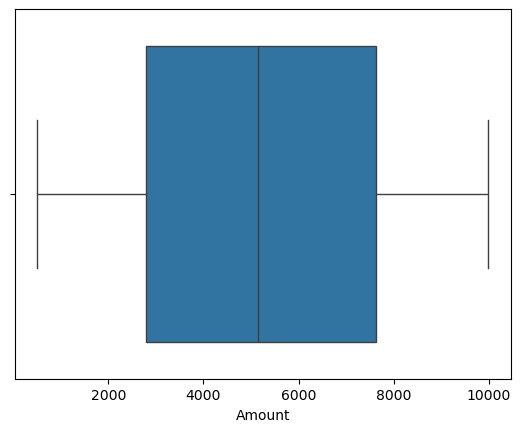

In [14]:
sns.boxplot(data=df, x='Amount')

Primeira Parte Análise Exploratória de Vendas

In [15]:
vendas_ano = df.groupby('Ano')['Profit'].sum().reset_index()
print(vendas_ano)

    Ano  Profit
0  2020  224103
1  2021  283231
2  2022  393113
3  2023  321671
4  2024  308336
5  2025   80243


In [16]:
qtdvendas_ano = df.groupby('Ano')['Quantity'].sum().reset_index()
print(qtdvendas_ano)

    Ano  Quantity
0  2020      1695
1  2021      2358
2  2022      3234
3  2023      2497
4  2024      2523
5  2025       438


In [17]:
Producao_Produto = df.groupby('Category')['Profit'].sum().reset_index()
print(Producao_Produto)

          Category  Profit
0      Electronics  518580
1        Furniture  540542
2  Office Supplies  551575


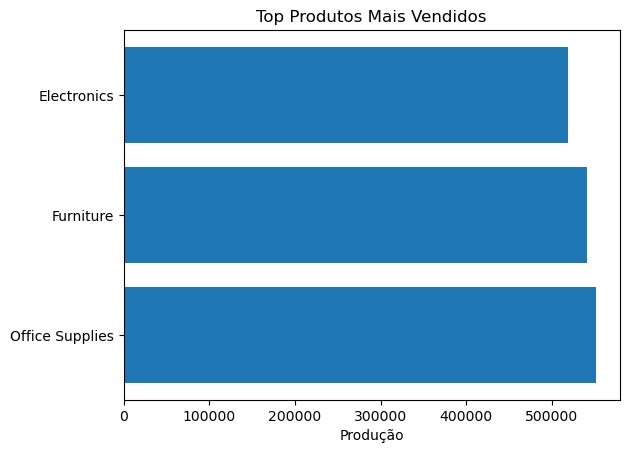

In [18]:
fig, ax = plt.subplots()

y_pos = range(len(Producao_Produto))
ax.barh(y_pos, Producao_Produto['Profit'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Producao_Produto['Category'])
ax.invert_yaxis()  # Para mostrar o produto mais vendido no topo
ax.set_xlabel('Produção')
ax.set_title('Top Produtos Mais Vendidos')

plt.show()

In [19]:
Prod_Estado = df.groupby(['Ano','State'])['Profit'].sum().reset_index()
Prod_Cidade = df.groupby(['Ano','City'])['Profit'].sum().reset_index()
top_10_Estado = Prod_Estado.sort_values(by='Profit', ascending=False).head(10)
top_10_Cidade = Prod_Cidade.sort_values(by='Profit', ascending=False).head(10)

print(top_10_Cidade)
print(top_10_Estado)

     Ano           City  Profit
87  2024  San Francisco   38320
36  2022         Austin   35102
47  2022        Orlando   33017
37  2022        Buffalo   31070
65  2023        Orlando   30642
49  2022      Rochester   27724
81  2024          Miami   27283
27  2021          Miami   27021
1   2020        Buffalo   26642
45  2022          Miami   26548
     Ano       State  Profit
13  2022     Florida   79394
24  2024  California   75903
17  2022       Texas   73455
21  2023    New York   68128
15  2022    New York   68073
14  2022    Illinois   60575
25  2024     Florida   59528
18  2023  California   58477
7   2021     Florida   56470
11  2021       Texas   56340


In [20]:
Ticket_Medio = df.groupby('CustomerName')['Profit'].mean().reset_index()
Top_10_clientes = Ticket_Medio.sort_values(by='Profit', ascending=False).head(10)

print(Top_10_clientes)


           CustomerName  Profit
83       Brandi Vasquez  4930.0
488        Maria Galvan  4585.0
30         Amy Thompson  4507.0
698      Sharon Wilkins  4477.0
47          Angela Todd  4441.0
145  Christopher Jordan  4401.0
655     Roberto Parrish  4361.0
255       George Ashley  4339.0
677         Sara Bailey  4339.0
376       Joseph Hooper  4299.0


In [21]:
vendas_AnoMes = df.groupby('Year-Month')['Profit'].sum().reset_index()
top10_Vendas_AnoMes = vendas_AnoMes.sort_values(by='Profit', ascending=False).head(10)
print(top10_Vendas_AnoMes)

   Year-Month  Profit
29    2022-08   58918
40    2023-07   49391
33    2022-12   48915
27    2022-06   45962
22    2022-01   39808
31    2022-10   39007
58    2025-01   38595
12    2021-03   36377
52    2024-07   36323
51    2024-06   36191


2ª Parte - Previsão de Vendas

In [22]:
df_numerico = df.select_dtypes(include = 'number')

In [23]:
correlacoes = df_numerico.corr()['Profit'].sort_values(ascending=False)
print(correlacoes)

Profit      1.000000
Amount      0.675285
Quantity    0.066088
Ano         0.031822
Mes        -0.027834
Name: Profit, dtype: float64


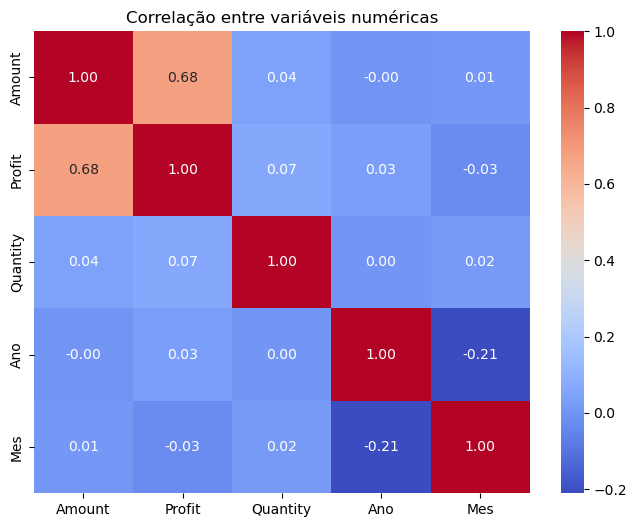

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Selecionar variáveis
X = df[['Amount','Quantity']]  # feature (entrada)
y = df['Profit']    # target (alvo)

# 2. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instanciar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = modelo.predict(X_test)

# 5. Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2%}")


MSE: 688303.02
R²: 45.68%


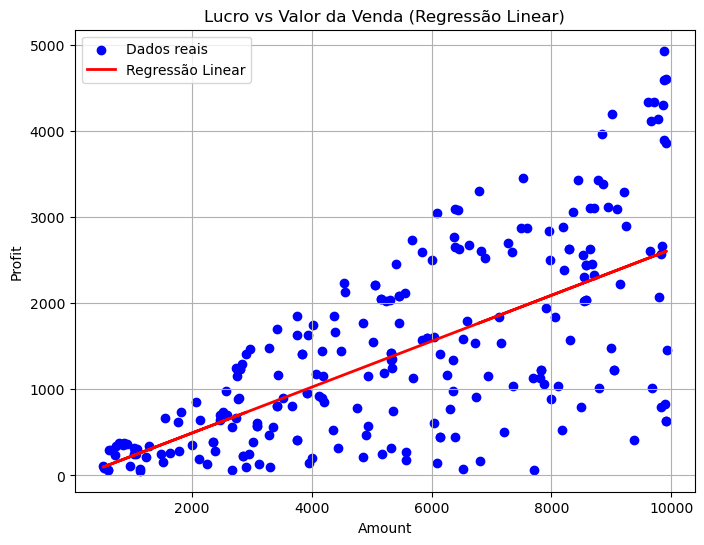

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Amount')
plt.ylabel('Profit')
plt.title('Lucro vs Valor da Venda (Regressão Linear)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
df_modelo = df[['Amount', 'PaymentMode', 'Profit']]
df_dummies = pd.get_dummies(df_modelo, columns=['PaymentMode'], drop_first=True)
df_dummies.head()


,Amount,Profit,PaymentMode_Credit Card,PaymentMode_Debit Card,PaymentMode_EMI,PaymentMode_UPI
0,9726,1275,False,False,False,True
1,9726,1275,False,False,False,True
2,9726,1275,False,False,False,True
3,4975,1330,False,False,False,True
4,4975,1330,False,False,False,True


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar X e y
X = df_dummies.drop('Profit', axis=1)
y = df_dummies['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Novo MSE: {mse:.2f}")
print(f"Novo R²: {r2:.2%}")


Novo MSE: 691990.11
Novo R²: 45.39%


In [43]:
# Mantendo os dados simples: apenas "Amount"
X = df[['Amount']]
y = df['Profit']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [45]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


In [46]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [48]:
print("📈 Comparativo dos Modelos:")
print(f"Regressão Linear - MSE: {mse_lr:.2f} | R²: {r2_lr:.2%}")
print(f"Árvore de Decisão - MSE: {mse_tree:.2f} | R²: {r2_tree:.2%}")
print(f"Random Forest - MSE: {mse_rf:.2f} | R²: {r2_rf:.2%}")


📈 Comparativo dos Modelos:
Regressão Linear - MSE: 679140.84 | R²: 46.40%
Árvore de Decisão - MSE: 749413.84 | R²: 40.85%
Random Forest - MSE: 662104.84 | R²: 47.74%
